In [1]:
# Paul-Jason Mello
# Professor Shim
# CMPE 257
# April 10th, 2022

# K Nearest Neighbour classification and K means clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [3]:
%matplotlib inline

plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = 15,15

## 1. What is the difference between classification and clustering?

In [4]:
# The difference in classification and clustering lies in the way it attempts to organize the data. 
# In classification we have clearly defined class labels while in clustering we may not know these labels.
# As a result we can see that classificaion is a supervised learning algorithm while clustering is an 
# unsupervised learning algorithm. Where clustering attempts to guess the potential groupings based on
# similarity, classifcation attempts to identify the exact label.

## 2. Explain in brief the working of KNN

In [5]:
# KNN is a supervised learning algorithm which assigns a common class based on K-nearest neighbors. This 
# means that we look at a user defined number of nearest neighbors (K) to a specific data point. From there
# we figure out what the majority of these nearest neighbors are classified as. From this we update the 
# current data point to represent the majority of the nearest data points and their classifications. We
# repeat this process until we have classified our data. Determining K can be tricky, but a screeplot of
# accuracies can help determine what the K should be given the "elbo method".

## 3. Explain in brief the working of K means

In [6]:
# K means is an unsupervised learning algorithm which uses distances from a randomly selected set of some 
# user defined number of centroids to determine the closest centroid. From there, these centroids are 
# updated and continually move to better encapsulate the distribution of the data. We find that overtime we
# can determine the best clustering of data points and through parameter tuning can find the optimal number
# of centroids to use. A weakness of K means is that it is difficult to determine K, our data should 
# contain little to no noise, and our model is sensitive to outliers.

## 4. What is the meaning of K in KNN and K means

In [7]:
# Simply put, the meaning of K is the number of classes we expect our data to need. It may not always be
# simple to determing what K is, but there are ways to figure it out. Either through brute force training
# and accuracy metrics, or through intimately understanding the expected number of unique class labels from
# the data set. K may be understood as the number of centroids in K means, or the number of nearest data 
# points in KNN.

## 5. Explain any 5 distance metrics in short.

In [8]:
# Euclidean Distance
# 
# EQ: distance(p, q) = sqrt((p - q)^2)
#
# The euclidean distance, also known as the pythagorean distance measures the distance between two points.
# In this specific equation it is able to find the distance of higher dimensional data. It is a simple
# and elegant solution for calculating the distance in metric space.

# Manhattan Distance
# 
# EQ: |x_1 - x_2| + |y_1 - y_2|
# 
# The manhattan distance, also known as L1 metric, is capable of regression, and frequency distribution.
# It essentially looks at nearby distances and acts as the one-norm distance between them.

# Minkowski Distance
# 
# EQ: sum((|X-Y|^ p))^(1/p)
# 
# The minkowski distance helps calculate distance between higher dimensional data. When p = 2 it is 
# equivalent to Euclidean distance.

# Cosine Distance
# 
# EQ:  ( (sum(X * Y)) / ((sqrt(sum(X^2))) * (sqrt(sum(Y^2)))) )
# 
# This metric can be used to calculate the similarity between documents. The idea is to take the cosine
# of the angle between two vectorized inputs and calculate that distance in higher dimension.

# Jaccard Similarity
# 
# EQ: Jaccard(A, B) = |A ∩ B| / |A ∪ B|
# 
# Jaccard similarity, like cosine distance, can help to understand the similarities between vectorized 
# inputs, like documents. It is calculated between 0 and 1 with 0 being no similarity and 1 being the same.

## 6. load and plot the dataset S1.txt file (comment how many natural classes you see)

In [9]:
S1Data = pd.read_csv("S1.txt", header = None)
S1Data.columns = ["Target"]

S1Data["First"] = S1Data['Target'].str.strip().str[:3-9]
S1Data["Second"] = S1Data['Target'].str.strip().str[-6:]

S1Data.drop("Target", axis = 1, inplace = True)

S1Data['First'] = S1Data['First'].astype(int)
S1Data['Second'] = S1Data['Second'].astype(int)

S1Data

,First,Second
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
4995,665426,853940
4996,691827,863963
4997,650661,861267
4998,599647,858702


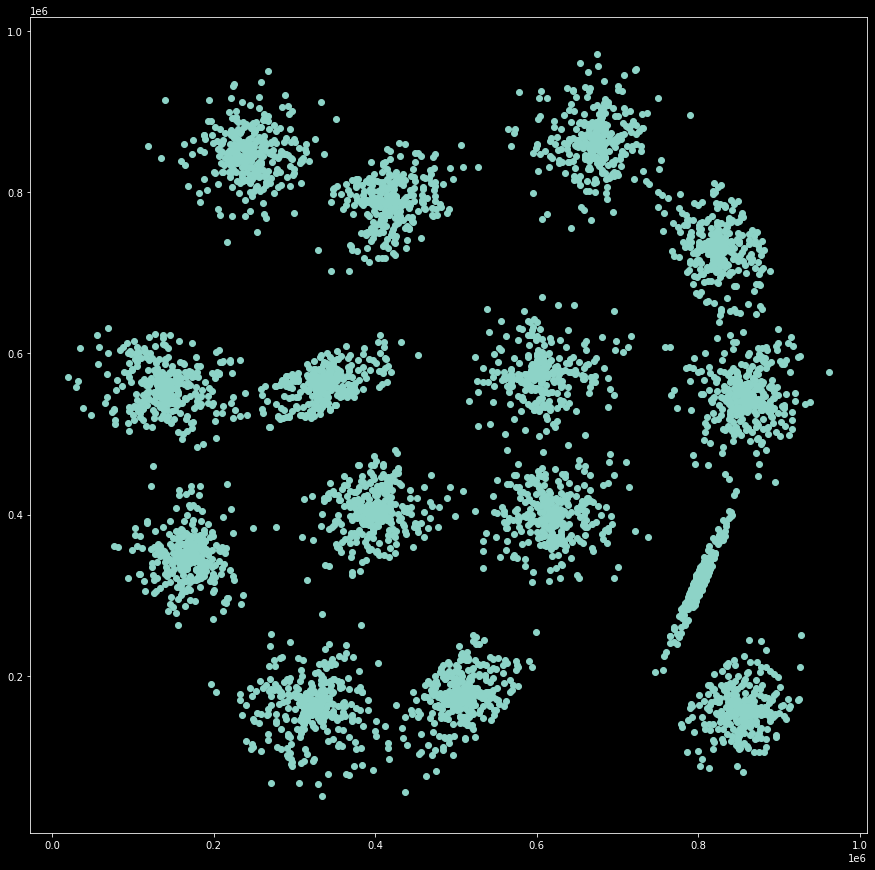

In [10]:
# After splitting the classes into X and Y the scatterplot demonstrates a very straight forward.
# There are multiple unique clusters that are obvious. It appears there are a total of 15 unique clusters.


plt.scatter(S1Data.First, S1Data.Second)

## 7. load the labels for the dataset and perform classification using KNN algorithm without using any library

In [11]:
labels = pd.read_csv("S1-labels.pa", header = None)
labels.columns = ["Label"]
labels

,Label
0,VQ PARTITIONING 2.0
1,15
2,5000
3,DataGen
4,-------------------------------------
...,...
5000,15
5001,15
5002,15
5003,15


In [12]:
Data = pd.DataFrame()

Data["Label"] = labels["Label"]
Data["First"] = S1Data["First"]
Data["Second"] = S1Data["Second"]
Data = Data.drop([5000,5001,5002,5003,5004])

S1Data = Data.copy()

In [13]:
# Some light preprocessing

S1Label = pd.DataFrame()

enc = LabelEncoder()
S1Data["Label"] = enc.fit_transform(S1Data["Label"])
S1Label["Label"] = S1Data["Label"]

S1Data["First"] = S1Data["First"].astype(int)
S1Data["Second"] = S1Data["Second"].astype(int)

S1Data.drop("Label", axis = 1, inplace = True)

S1Data

,First,Second
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046
...,...,...
4995,665426,853940
4996,691827,863963
4997,650661,861267
4998,599647,858702


In [14]:
S1Label

,Label
0,18
1,7
2,12
3,17
4,0
...,...
4995,7
4996,7
4997,7
4998,7


In [15]:
S1Data.isnull().sum()

First     0
Second    0
dtype: int64

In [16]:
S1Data = S1Data.dropna()

In [17]:
S1Data.nunique()

First     4987
Second    4973
dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(S1Data, S1Label["Label"], test_size = 0.3)

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3500, 2), (3500,), (1500, 2), (1500,))

In [19]:
x_test

array([[333682, 401078],
       [185935, 554627],
       [144228, 344974],
       ...,
       [807017, 330432],
       [582777, 542670],
       [851010, 157593]])

In [20]:
from scipy import stats # I couldnt figure out an implementation which did not use stats.mode

In [21]:
class KNN:

    def __init__(self, x_train):
        self.x_train = x_train

    def predict(self, KClasses, x_test, y_train):
        y_pred = []
        for i in range(x_test.shape[0]):
            pairDistMax = [] 
            for j in range(self.x_train.shape[0]):  
                diff = (np.square(x_test[i, :] - self.x_train[j, :]))
                sumDiff = np.sum(diff)
                eucDist = (np.sqrt(sumDiff))
                pairDistMax.append((eucDist, y_train[j])) 
            pairDistMax = max(pairDistMax)
            temp = []
            for k in range(KClasses):
                temp.append(pairDistMax[1])
            y_pred.append(stats.mode(temp)[0][0])
        return y_pred

In [22]:
kNNModel = KNN(x_train)
y_pred = kNNModel.predict(7, x_test, y_train)

C:\Users\GIGA\AppData\Local\Temp/ipykernel_5908/161890032.py:13: RuntimeWarning: invalid value encountered in sqrt
  eucDist = (np.sqrt(sumDiff))


In [23]:
y_pred = np.asarray(y_pred)

In [24]:
x_test

array([[333682, 401078],
       [185935, 554627],
       [144228, 344974],
       ...,
       [807017, 330432],
       [582777, 542670],
       [851010, 157593]])

In [25]:
# These two are definitively different and I'm not sure why

print(str(y_test))
print(str(y_pred))

[ 5  3 14 ...  8  1 11]
[ 6  8 11 ...  6 13 14]


In [26]:
x_test = pd.DataFrame(x_test, columns = ["First","Second"])
x_test

,First,Second
0,333682,401078
1,185935,554627
2,144228,344974
3,216846,737568
4,394606,401451
...,...,...
1495,420509,788730
1496,243941,843256
1497,807017,330432
1498,582777,542670


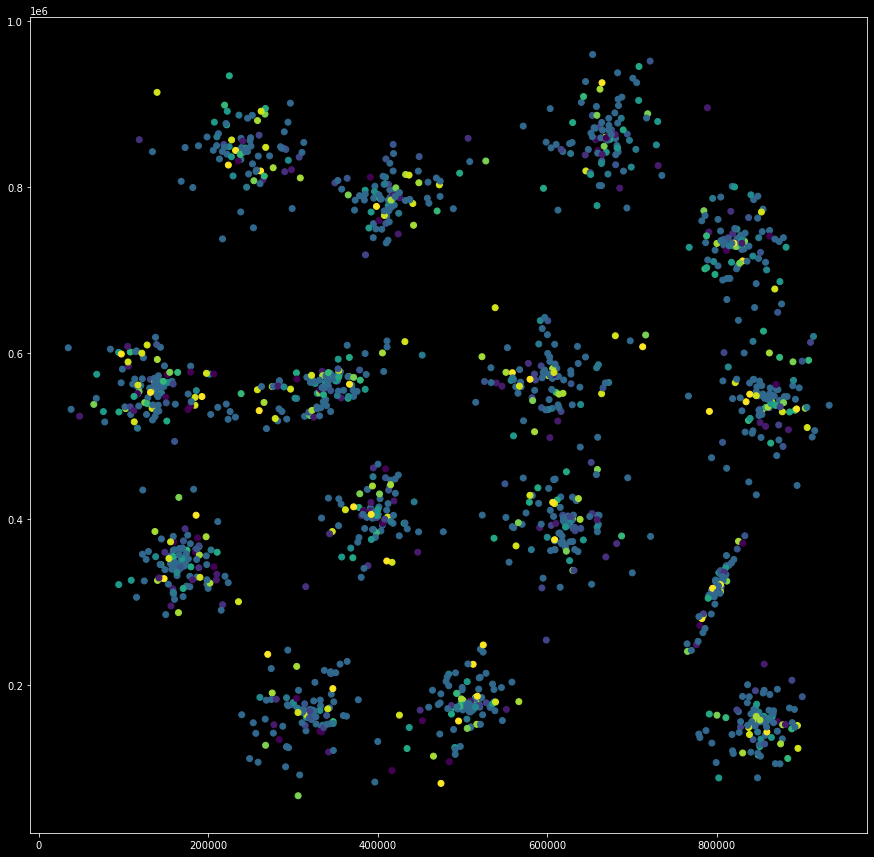

In [27]:
plt.scatter(x_test["First"], x_test["Second"], c = y_pred) # My guess
plt.show()

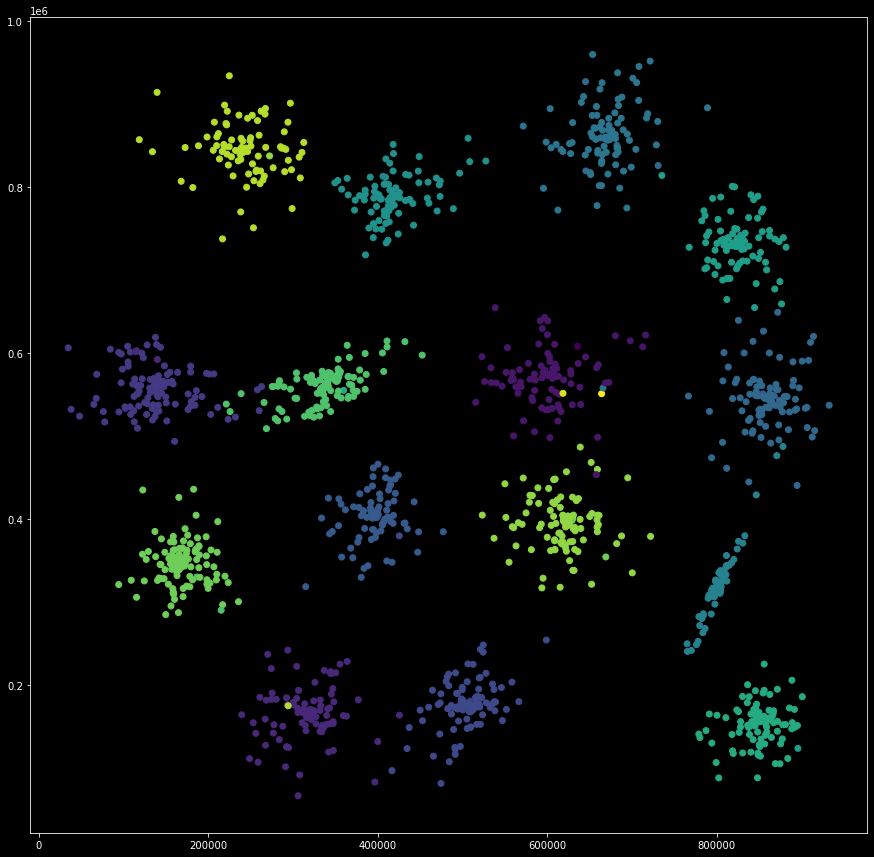

In [28]:
# There are some clusters which are improperly classified. Potential off by one errors.


plt.scatter(x_test["First"], x_test["Second"], c = y_test) # Correct Answers
plt.show()

In [29]:
# Im not sure why my KNN classification doesnt work. I believe it has something to do with the way I am calculating the 
# euclidean distance. It may also be an issue with how I am extracting the most frequent variable using stats.mode. This 
# method may not be working the way I intended it to. Regardless, my output is wrong.

## 8. perform classification on the above dataset using KNN from sklearn (try different distance metrics and compare their results)

In [30]:
# Since we know our data has 19 unique labels we expect that to be the best K. However, in practice, we found that our
# modelling did not return better results past around 7 neighbors

In [31]:
x_train, x_test, y_train, y_test = train_test_split(S1Data, S1Label["Label"], test_size = 0.3)

In [32]:
def modelKNN(data1, data2, k, dist):
    KNN = KNeighborsClassifier(n_neighbors = k, metric = dist)
    KNN.fit(data1, data2)
    return KNN

In [33]:
# 15 iterations were chosen because not much change was seen with manual testing past 15 itearions. 

def printer(metric):
    for i in range(15):
        KNNmodel = modelKNN(x_train, y_train, i + 1, metric)
        y_pred = KNNmodel.predict(x_test)
        print("Accuracy Score for K-Nearest Neighbors: " + str(round(accuracy_score(y_test, y_pred), 5)) 
              + "\t\tNeighbors: " + str(i + 1) + "\t Distance Metric: " + str(metric))

In [34]:
printer("euclidean")

Accuracy Score for K-Nearest Neighbors: 0.95867		Neighbors: 1	 Distance Metric: euclidean
Accuracy Score for K-Nearest Neighbors: 0.948		Neighbors: 2	 Distance Metric: euclidean
Accuracy Score for K-Nearest Neighbors: 0.972		Neighbors: 3	 Distance Metric: euclidean
Accuracy Score for K-Nearest Neighbors: 0.97267		Neighbors: 4	 Distance Metric: euclidean
Accuracy Score for K-Nearest Neighbors: 0.976		Neighbors: 5	 Distance Metric: euclidean
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 6	 Distance Metric: euclidean
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 7	 Distance Metric: euclidean
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 8	 Distance Metric: euclidean
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 9	 Distance Metric: euclidean
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 10	 Distance Metric: euclidean
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 11	 Distance Metric: euclidean
Accuracy Score

In [35]:
printer("minkowski")

Accuracy Score for K-Nearest Neighbors: 0.95867		Neighbors: 1	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.948		Neighbors: 2	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.972		Neighbors: 3	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97267		Neighbors: 4	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.976		Neighbors: 5	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 6	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 7	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 8	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 9	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 10	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 11	 Distance Metric: minkowski
Accuracy Score

In [36]:
printer("chebyshev")

Accuracy Score for K-Nearest Neighbors: 0.95933		Neighbors: 1	 Distance Metric: chebyshev
Accuracy Score for K-Nearest Neighbors: 0.94867		Neighbors: 2	 Distance Metric: chebyshev
Accuracy Score for K-Nearest Neighbors: 0.97133		Neighbors: 3	 Distance Metric: chebyshev
Accuracy Score for K-Nearest Neighbors: 0.972		Neighbors: 4	 Distance Metric: chebyshev
Accuracy Score for K-Nearest Neighbors: 0.97533		Neighbors: 5	 Distance Metric: chebyshev
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 6	 Distance Metric: chebyshev
Accuracy Score for K-Nearest Neighbors: 0.976		Neighbors: 7	 Distance Metric: chebyshev
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 8	 Distance Metric: chebyshev
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 9	 Distance Metric: chebyshev
Accuracy Score for K-Nearest Neighbors: 0.97733		Neighbors: 10	 Distance Metric: chebyshev
Accuracy Score for K-Nearest Neighbors: 0.97733		Neighbors: 11	 Distance Metric: chebyshev
Accuracy Sco

In [37]:
printer("minkowski")

Accuracy Score for K-Nearest Neighbors: 0.95867		Neighbors: 1	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.948		Neighbors: 2	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.972		Neighbors: 3	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97267		Neighbors: 4	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.976		Neighbors: 5	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 6	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 7	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 8	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 9	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 10	 Distance Metric: minkowski
Accuracy Score for K-Nearest Neighbors: 0.97667		Neighbors: 11	 Distance Metric: minkowski
Accuracy Score

In [38]:
printer("cosine")

Accuracy Score for K-Nearest Neighbors: 0.552		Neighbors: 1	 Distance Metric: cosine
Accuracy Score for K-Nearest Neighbors: 0.532		Neighbors: 2	 Distance Metric: cosine
Accuracy Score for K-Nearest Neighbors: 0.57467		Neighbors: 3	 Distance Metric: cosine
Accuracy Score for K-Nearest Neighbors: 0.59267		Neighbors: 4	 Distance Metric: cosine
Accuracy Score for K-Nearest Neighbors: 0.60733		Neighbors: 5	 Distance Metric: cosine
Accuracy Score for K-Nearest Neighbors: 0.61267		Neighbors: 6	 Distance Metric: cosine
Accuracy Score for K-Nearest Neighbors: 0.61667		Neighbors: 7	 Distance Metric: cosine
Accuracy Score for K-Nearest Neighbors: 0.61467		Neighbors: 8	 Distance Metric: cosine
Accuracy Score for K-Nearest Neighbors: 0.61467		Neighbors: 9	 Distance Metric: cosine
Accuracy Score for K-Nearest Neighbors: 0.62133		Neighbors: 10	 Distance Metric: cosine
Accuracy Score for K-Nearest Neighbors: 0.63		Neighbors: 11	 Distance Metric: cosine
Accuracy Score for K-Nearest Neighbors: 0.636		N

In [39]:
printer("jaccard")

Accuracy Score for K-Nearest Neighbors: 0.07133		Neighbors: 1	 Distance Metric: jaccard
Accuracy Score for K-Nearest Neighbors: 0.07133		Neighbors: 2	 Distance Metric: jaccard
Accuracy Score for K-Nearest Neighbors: 0.07133		Neighbors: 3	 Distance Metric: jaccard
Accuracy Score for K-Nearest Neighbors: 0.07133		Neighbors: 4	 Distance Metric: jaccard
Accuracy Score for K-Nearest Neighbors: 0.07133		Neighbors: 5	 Distance Metric: jaccard
Accuracy Score for K-Nearest Neighbors: 0.07133		Neighbors: 6	 Distance Metric: jaccard
Accuracy Score for K-Nearest Neighbors: 0.07133		Neighbors: 7	 Distance Metric: jaccard
Accuracy Score for K-Nearest Neighbors: 0.07133		Neighbors: 8	 Distance Metric: jaccard
Accuracy Score for K-Nearest Neighbors: 0.07133		Neighbors: 9	 Distance Metric: jaccard
Accuracy Score for K-Nearest Neighbors: 0.07133		Neighbors: 10	 Distance Metric: jaccard
Accuracy Score for K-Nearest Neighbors: 0.07133		Neighbors: 11	 Distance Metric: jaccard
Accuracy Score for K-Nearest N

In [40]:
# We can see that the lowest similarity metric is jaccard. The highest was tied between minkowski, 
# chebyshev, and euclidean. Im surpirsed they produced such similar results. The most interesting was 
# cosine because of its increasingly better results through each iteration. There was constant change 
# unlike any of our other tested distance metrics.

## 10. load and plot S2.txt

In [41]:
S2Data = pd.read_csv("S2.txt", header = None)
S2Data.columns = ["Target"]

S2Data["First"] = S2Data['Target'].str.strip().str[:3-9]
S2Data["Second"] = S2Data['Target'].str.strip().str[-6:]

S2Data.drop("Target", axis = 1, inplace = True)

S2Data['First'] = S2Data['First'].astype(int)
S2Data['Second'] = S2Data['Second'].astype(int)
S2DatAug = S2Data.to_numpy()

S2Data

,First,Second
0,624474,837604
1,673412,735362
2,647442,677000
3,532283,741384
4,646529,742844
...,...,...
4995,540118,671072
4996,507453,777031
4997,569266,738385
4998,444587,878830


In [42]:
S2Data.isnull().sum()

First     0
Second    0
dtype: int64

In [43]:
S2Data.nunique()

First     4973
Second    4976
dtype: int64

<AxesSubplot:xlabel='First', ylabel='Second'>

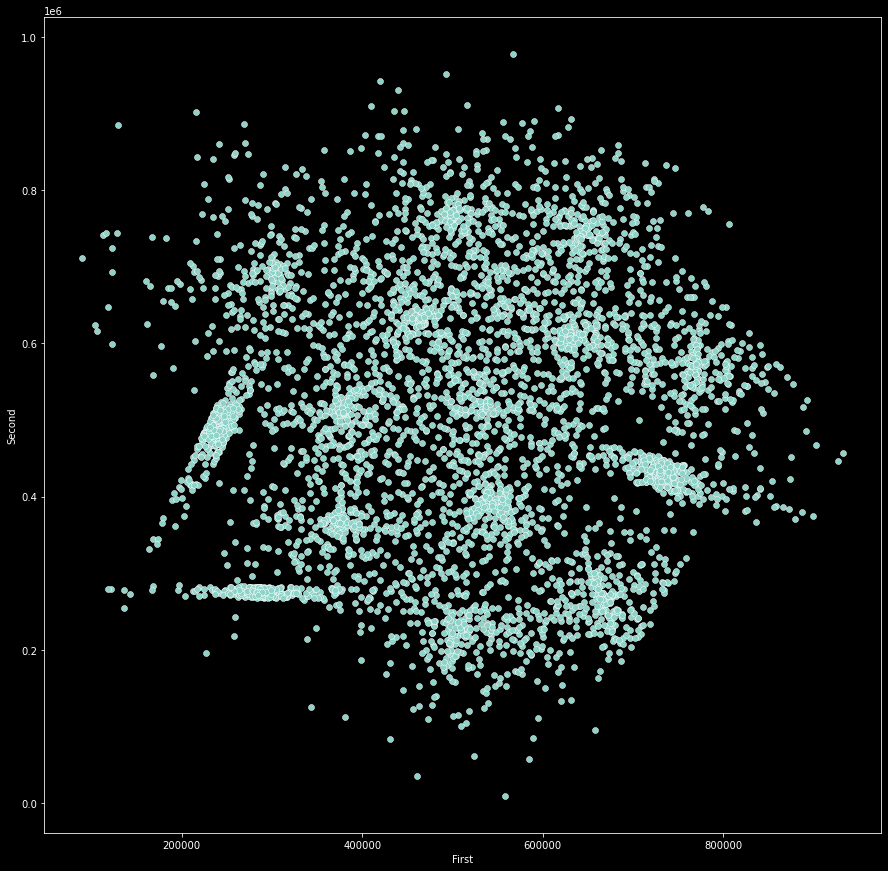

In [44]:
sns.scatterplot(data = S2Data, x = "First", y = "Second")

## 11. perform k means clustering on S2.txt without using any library and plot the results

In [45]:
import random #I hope I am allowed to use a randomizer library


class KMEANS:
    def __init__(self, data, clusterCount): 
        self.hh, self.kk = data.shape
        self.KClusters = clusterCount

    def centroidStart(self, data): 
        centerCluster = np.zeros((self.KClusters, self.kk))
        for i in range(self.KClusters):
            rand = random.randint(1, self.hh)
            centerCluster[i] = data[rand]
        return centerCluster

    def clusterComputer(self, data, oldValue):
        clusterVals = [[] for i in range(self.KClusters)]
        for j, curVal in enumerate(data):   
            summed = (np.sum((curVal - oldValue) ** 2, axis = 1))
            sqrtVal = (np.sqrt(summed))
            minCentroidDistIndex = (np.argmin(sqrtVal))
            clusterVals[minCentroidDistIndex] = j
        return clusterVals
    
    def updateCentroidVals(self, data, value):
        valueCenter = np.zeros((self.KClusters, self.kk))
        for i, j in enumerate(value):
            valueCenter[i] = np.mean(data[i], axis = 0)
        return valueCenter    
    
    def predClust(self, data, clusterData):
        y_pred = np.zeros(self.hh)
        k = 0
        for i, j in enumerate(clusterData):
            y_pred[k] = i
            k = k + 1
        return y_pred

In [46]:
Kmeans = KMEANS(S2DatAug, 7)
newCentroid = Kmeans.centroidStart(S2DatAug)

for i in range(7):
    clusterData = Kmeans.clusterComputer(S2DatAug, newCentroid)
    oldCentroid = newCentroid
    newCentroid = Kmeans.updateCentroidVals(S2DatAug, clusterData)  
    
y_pred = Kmeans.predClust(clusterData, S2DatAug)

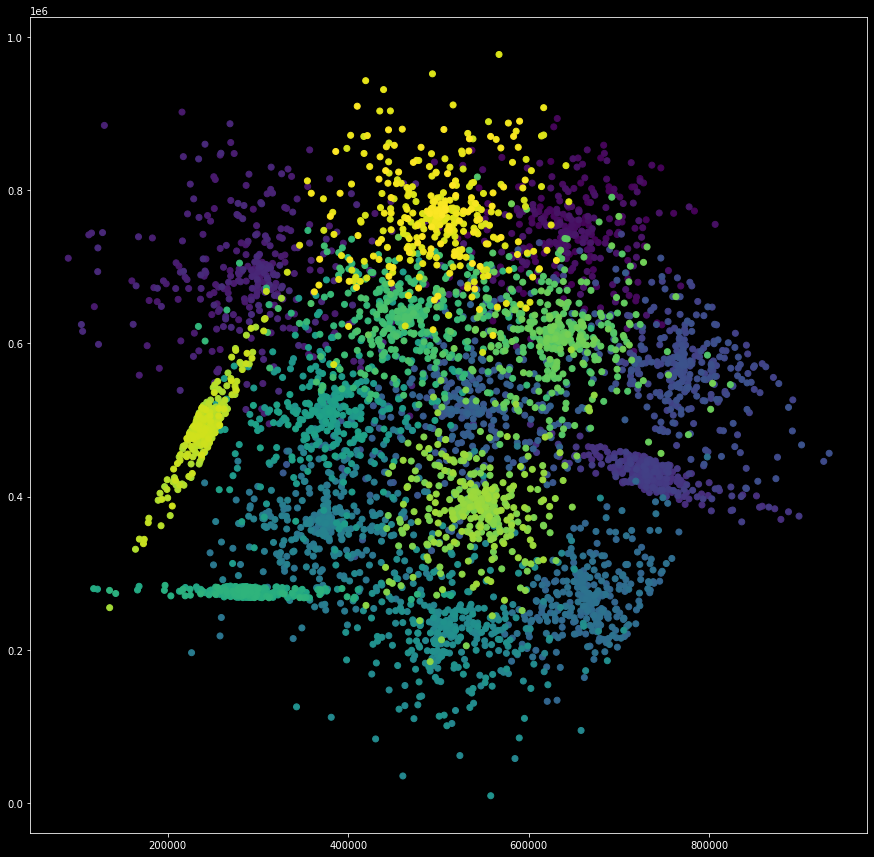

In [47]:
plt.scatter(S2Data["First"], S2Data["Second"], c = y_pred)
plt.show()

## 12. perform k means clustering on S2.txt using sklearn library and plot the results

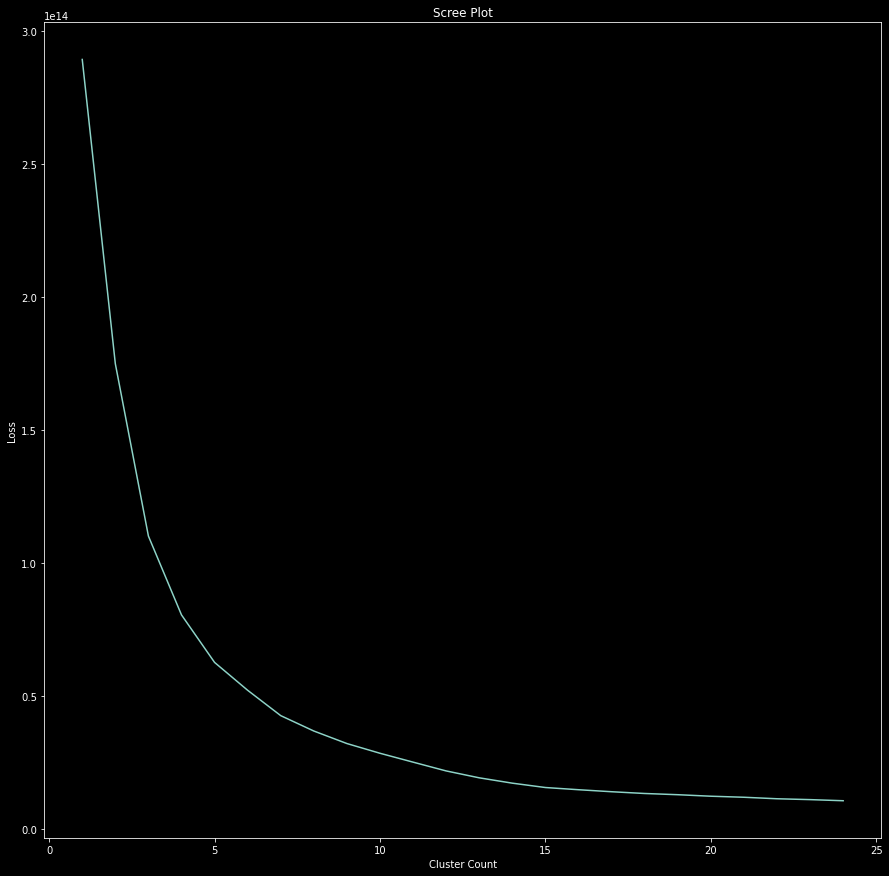

In [48]:
# 15 iterations were chosen because not much change was seen with manual testing past 15 itearions. 

KRange = range(1, 25)
kmeans = [KMeans(n_clusters = i) for i in KRange]
accuracy = [100 - kmeans[i].fit(S2Data).score(S2Data) for i in range(len(kmeans))]
plt.plot(KRange, accuracy)
plt.ylabel("Loss")
plt.xlabel("Cluster Count")
plt.title("Scree Plot")
plt.show()

In [49]:
# Using the elbow method I would say that 7 appears to be a strong contender. 